In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Ensure inline plotting
%matplotlib inline

# Load the dataset
df = pd.read_csv('Ad Click Data.csv')

In [2]:
# Display the first few rows
print(df.head())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh   0.0     Tunisia   
1     Monitored national standardization       West Jodi   1.0       Nauru   
2       Organic bottom-line service-desk        Davidton   0.0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt   1.0       Italy   
4          Robust logistical utilization    South Manuel   0.0     Iceland   

         Timestamp  Clicked on Ad  
0   3/27/2016 0:53              0  
1    4/4/2016 1:39              

In [3]:
# Print the shape of the dataset
print('Number of examples and features:', df.shape)


Number of examples and features: (1000, 10)


In [4]:
# List all the features in the dataset
print('Features in the dataset:', df.columns.tolist())

# Display information about the dataset
df.info()



Features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ 

In [5]:
# Display statistical summary of the dataset
print(df.describe())

       Daily Time Spent on Site          Age   Area Income  \
count                987.000000  1000.000000    987.000000   
mean                  64.929524    36.009000  54980.667234   
std                   15.844699     8.785562  13439.998510   
min                   32.600000    19.000000  13996.500000   
25%                   51.270000    29.000000  46947.570000   
50%                   68.110000    35.000000  57009.760000   
75%                   78.460000    42.000000  65479.350000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage        Male  Clicked on Ad  
count            989.000000  997.000000     1000.00000  
mean             179.863620    0.480441        0.50000  
std               43.870142    0.499868        0.50025  
min              104.780000    0.000000        0.00000  
25%              138.710000    0.000000        0.00000  
50%              182.650000    0.000000        0.50000  
75%              218.790000    1.000000   

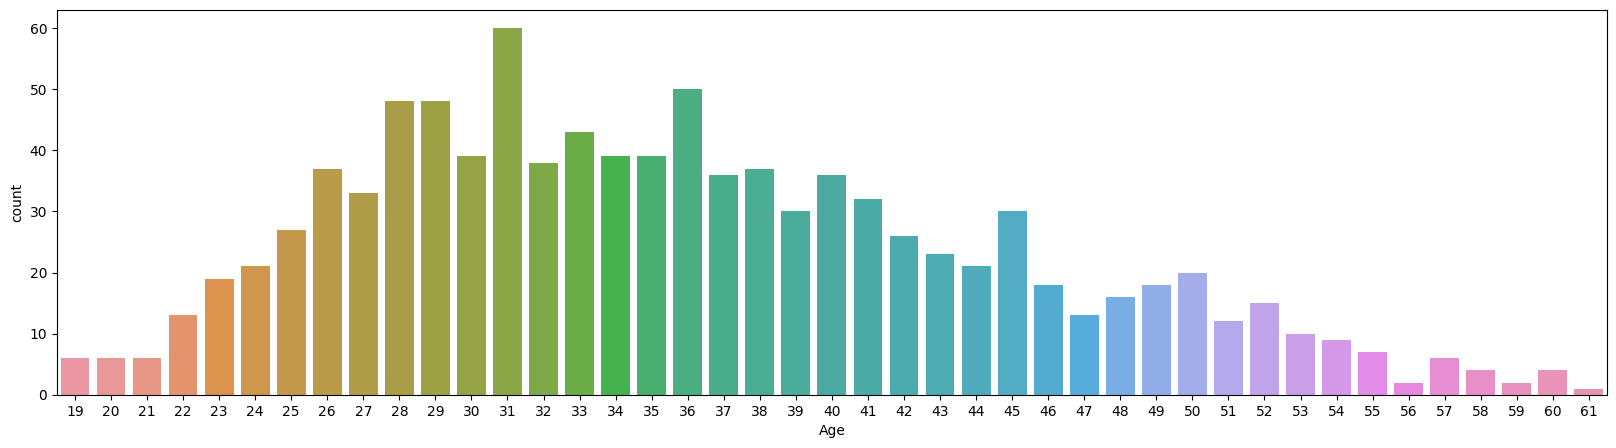

In [6]:
# Visualizations
fig = plt.figure(figsize=(20, 5))

# Count plot for Age
sns.countplot(x='Age', data=df)
plt.show()

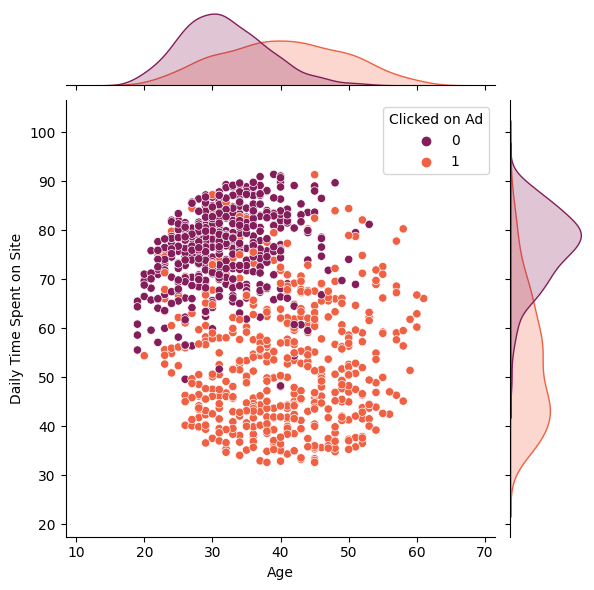

In [7]:
# Joint plot for Age vs Daily Time Spent on Site
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, hue="Clicked on Ad", palette='rocket')
plt.show()



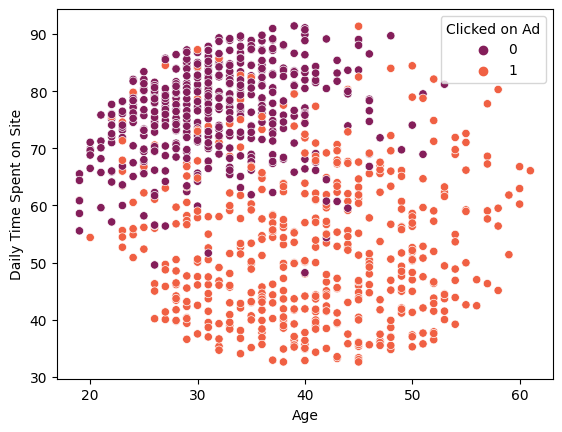

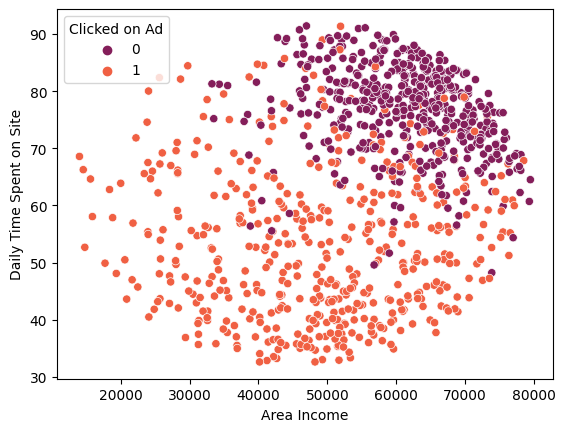

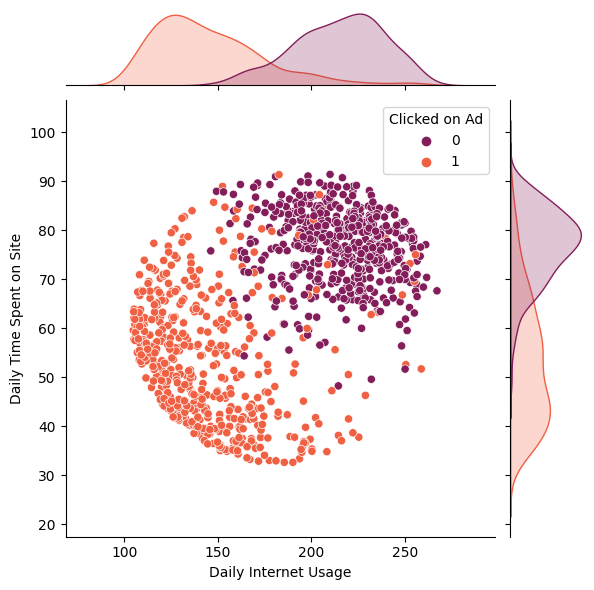

In [8]:
# Scatter plot for Age vs Daily Time Spent on Site
sns.scatterplot(x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df, palette='rocket')
plt.show()

# Scatter plot for Area Income vs Daily Time Spent on Site
sns.scatterplot(x='Area Income', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df, palette='rocket')
plt.show()

# Joint plot for Daily Internet Usage vs Daily Time Spent on Site
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, hue="Clicked on Ad", palette='rocket')
plt.show()

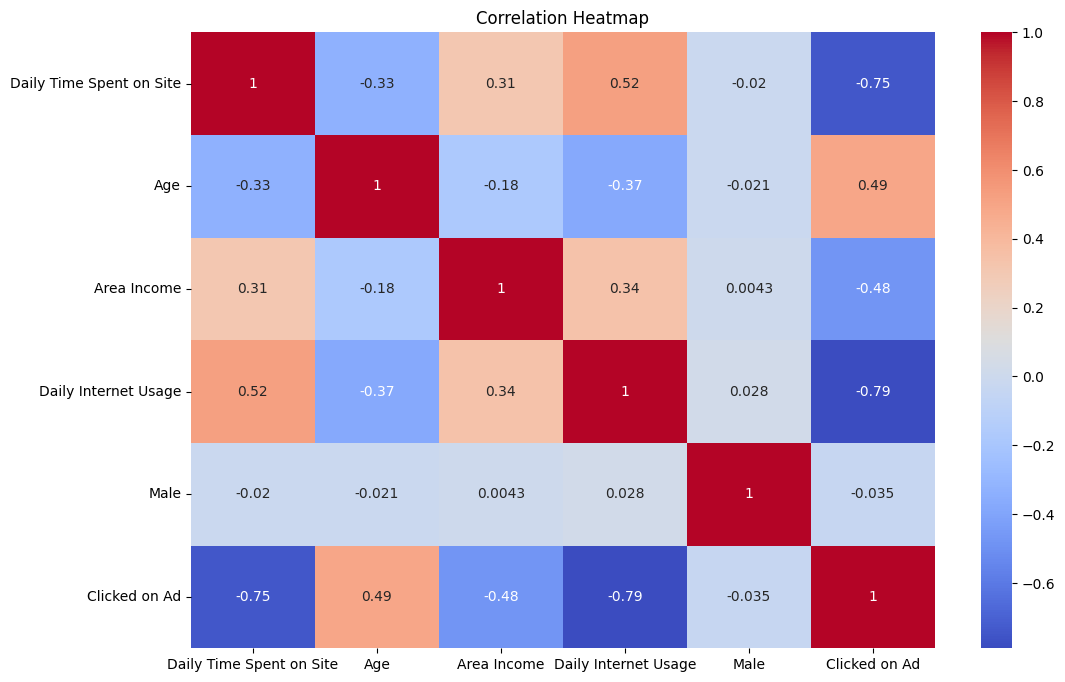

In [9]:
# Filter the dataframe to include only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])


# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/home/avan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


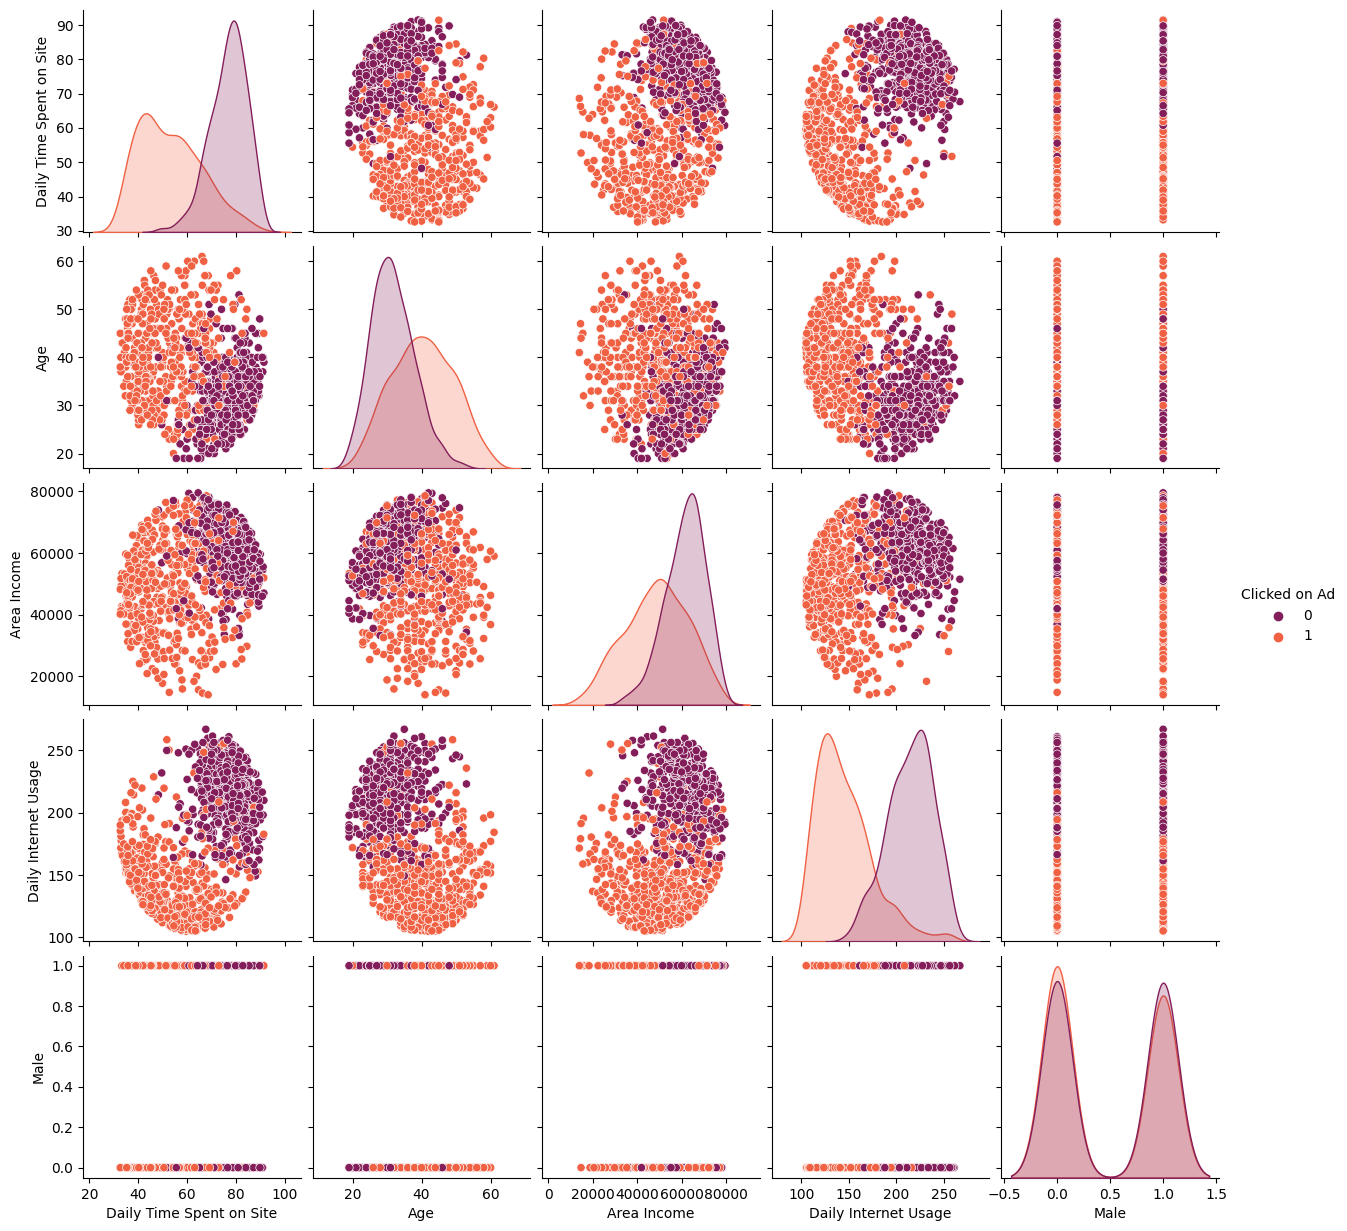

In [10]:
# Pair plot
sns.pairplot(df, hue="Clicked on Ad", palette='rocket')
plt.show()

In [11]:

# List of features to be used for model training
features = ['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']

# Drop rows with missing values
df2 = df.dropna()

# Print information about the new dataframe
df2.info()

# Columns to be dropped
columns_to_drop = ['Male', 'Country', 'Timestamp', 'Ad Topic Line', 'City']

# Drop specified columns
df2.drop(columns=columns_to_drop, inplace=True)

# Ensure Age column is of float type
df2['Age'] = df2['Age'].astype(float)

# Ensure 'Clicked on Ad' column is of float type
df2['Clicked on Ad'] = df2['Clicked on Ad'].astype(float)

# Print updated information about the dataframe
df2.info()



<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  953 non-null    float64
 1   Age                       953 non-null    int64  
 2   Area Income               953 non-null    float64
 3   Daily Internet Usage      953 non-null    float64
 4   Ad Topic Line             953 non-null    object 
 5   City                      953 non-null    object 
 6   Male                      953 non-null    float64
 7   Country                   953 non-null    object 
 8   Timestamp                 953 non-null    object 
 9   Clicked on Ad             953 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 81.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------            

/tmp/ipykernel_40446/1248168987.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=columns_to_drop, inplace=True)
/tmp/ipykernel_40446/1248168987.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = df2['Age'].astype(float)
/tmp/ipykernel_40446/1248168987.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2["Clicked on Ad"], random_state=20)

# Initialize and train the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 31)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [13]:
# Best parameters and score for KNN
print("Best KNN Parameters: ", grid_knn.best_params_)
print("Best KNN Cross-Validation Score: {:.2f}".format(grid_knn.best_score_))


Best KNN Parameters:  {'n_neighbors': 1}
Best KNN Cross-Validation Score: 0.77


In [14]:
# Evaluate the best KNN model
best_knn = grid_knn.best_estimator_
print("\nBest KNN TEST SCORE [ACCURACY]: {:.2f}\n".format(best_knn.score(X_test, y_test)))



Best KNN TEST SCORE [ACCURACY]: 0.78



In [15]:
# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=20)
param_grid_rf = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [16]:
# Best parameters and score for Random Forest
print("Best Random Forest Parameters: ", grid_rf.best_params_)
print("Best Random Forest Cross-Validation Score: {:.2f}".format(grid_rf.best_score_))


Best Random Forest Parameters:  {'max_depth': None, 'n_estimators': 10}
Best Random Forest Cross-Validation Score: 0.96


In [17]:
# Evaluate the best Random Forest model
best_rf = grid_rf.best_estimator_
print("\nBest Random Forest TEST SCORE [ACCURACY]: {:.2f}\n".format(best_rf.score(X_test, y_test)))



Best Random Forest TEST SCORE [ACCURACY]: 0.96



In [18]:
# Evaluate feature importance using the best Random Forest model
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                           Importance
Daily Internet Usage        0.510882
Daily Time Spent on Site    0.384135
Area Income                 0.068110
Age                         0.036873


In [19]:
# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("\nLogistic Regression TEST SCORE [ACCURACY]: {:.2f}\n".format(lr.score(X_test, y_test)))



Logistic Regression TEST SCORE [ACCURACY]: 0.90



In [20]:
# Initialize and train SVM
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy')

In [21]:
# Best parameters and score for SVM
print("Best SVM Parameters: ", grid_svm.best_params_)
print("Best SVM Cross-Validation Score: {:.2f}".format(grid_svm.best_score_))


Best SVM Parameters:  {'C': 10, 'gamma': 0.001}
Best SVM Cross-Validation Score: 0.75


In [22]:
# Evaluate the best SVM model
best_svm = grid_svm.best_estimator_
print("\nBest SVM TEST SCORE [ACCURACY]: {:.2f}\n".format(best_svm.score(X_test, y_test)))



Best SVM TEST SCORE [ACCURACY]: 0.71



In [23]:
# Predictions and evaluation
knn_predictions = best_knn.predict(X_test)
rf_predictions = best_rf.predict(X_test)
lr_predictions = lr.predict(X_test)
svm_predictions = best_svm.predict(X_test)


In [24]:
# Classification report
print("\nKNN Classification Report:\n", classification_report(y_test, knn_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))



KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.77      0.77       115
         1.0       0.79      0.80      0.79       124

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       115
         1.0       1.00      0.93      0.96       124

    accuracy                           0.96       239
   macro avg       0.96      0.96      0.96       239
weighted avg       0.97      0.96      0.96       239


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       115
         1.0       0.95      0.85      0.90       124

    accuracy                           0.90       239
   macro avg   

In [25]:
# Confusion matrix
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))



KNN Confusion Matrix:
 [[88 27]
 [25 99]]

Random Forest Confusion Matrix:
 [[115   0]
 [  9 115]]

Logistic Regression Confusion Matrix:
 [[110   5]
 [ 18 106]]

SVM Confusion Matrix:
 [[ 53  62]
 [  8 116]]


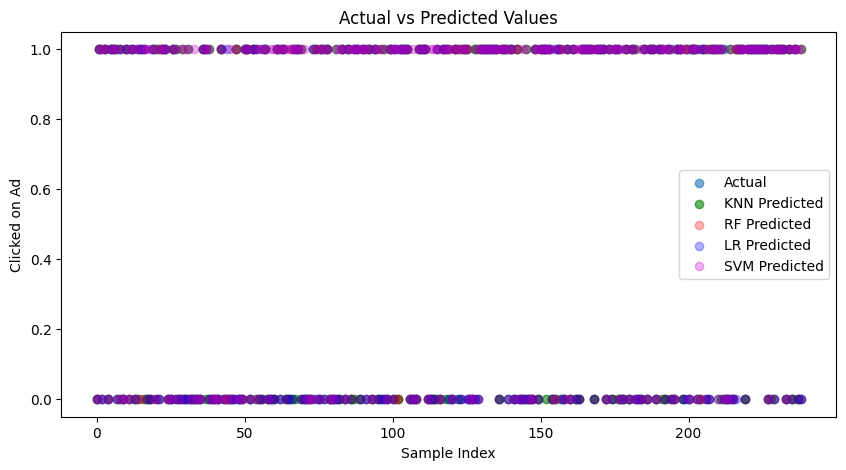

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(range(len(X_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(X_test)), knn_predictions, color='g', label='KNN Predicted', alpha=0.6)
plt.scatter(range(len(X_test)), rf_predictions, color='r', label='RF Predicted', alpha=0.3)
plt.scatter(range(len(X_test)), lr_predictions, color='b', label='LR Predicted', alpha=0.3)
plt.scatter(range(len(X_test)), svm_predictions, color='m', label='SVM Predicted', alpha=0.3)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Clicked on Ad')
plt.title('Actual vs Predicted Values')
plt.show()
